# Demand Curve step by step

## Let's start with a survey in Google Forms about willingness to pay for four goods.  

We will create a few demand curves based on the class. Start by filling in the form at (also linked on data88e.org/fa25 or in Slide Deck)
 - https://forms.gle/vVwcy3mR5nt4br4W7   
 

In [80]:
import pandas as pd
from datascience import *
import numpy as np
%matplotlib inline

## Find the Sheet ID in the URL of the Google Sheet!

*Behind every Google Form there is a Google Sheet*


Take a look at the data in the spreadsheet 


https://docs.google.com/spreadsheets/d/1HcRJzKtVfriF3cUpBgixYTsQC7--dhFq8hEJFt7l1BY/edit?usp=sharing

In [81]:
sheet_id = "1HcRJzKtVfriF3cUpBgixYTsQC7--dhFq8hEJFt7l1BY"
sheet_name = "Form1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [82]:
# Last years data for comparison
sheet_id = "1jp-XrFPk0eUNDUVWGa7Rmw9b0P8_jobTG0oLpvcHB9s"
sheet_name = "Form1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

Read it into a datascience table

In [83]:
demand_table = Table.read_table(url)
demand_table

Timestamp,Coffee,Burrito,GreekTix,iPhone
9/4/2024 12:05:19,0.5,2.5,25,250
9/4/2024 12:05:29,1,5,50,500
9/4/2024 12:05:41,1.5,7.5,75,750
9/4/2024 12:05:54,2,10,100,1000
9/4/2024 12:06:05,2.5,12.5,125,1250
9/4/2024 12:06:17,3,15,125,1250
9/4/2024 12:06:30,3.5,17.5,175,1750
9/4/2024 12:06:39,4,20,200,2000
9/4/2024 12:41:43,0.5,2.5,25,250
9/4/2024 14:55:09,3.5,12.5,25,500


In [84]:
demand_table.ihist("Coffee",bins=7)

In [85]:
demand_table.ihist("Burrito",bins=7)

## Gonna roll with Burrito for this example

Step 1 - Lets pull out just Burritos 

This is a table with just Burrito prices that people are willing to pay ( bids)

In [86]:
Burrito = demand_table.select("Burrito")
Burrito

Burrito
2.5
5
7.5
10
12.5
15
17.5
20
2.5
12.5


Step 2 - Let's count the number at each price

And sort the table so that it is descending from high to low price


In [87]:
# count the number at each price
Burrito_counts = demand_table.group("Burrito")
Burrito_counts = Burrito_counts.sort('Burrito', descending=True)

Burrito_counts

Burrito,count
20,4
17.5,4
15,17
12.5,33
10,26
7.5,20
5,14
2.5,6


Step 3 - Let's pull out those counts 


In [88]:
counts = Burrito_counts.column("count")
print(counts) 

[ 4  4 17 33 26 20 14  6]


Step 4 - use a numpy command called cumulative sum to get the number of people who will buy at each price


In [89]:
cumulative_counts = counts.cumsum()
cumulative_counts

array([  4,   8,  25,  58,  84, 104, 118, 124])

Step 5 - make an array of the prices of the burritos in descending order


In [90]:
prices = make_array(20,17.5,15,12.5,10,7.5,5,2.5)
prices

array([ 20. ,  17.5,  15. ,  12.5,  10. ,   7.5,   5. ,   2.5])

Step 6 -  make a table with the prices and the cumulative counts


In [91]:
demand_curve = Table().with_columns("Price", prices, "Cumulative Count", cumulative_counts)
demand_curve

Price,Cumulative Count
20,4
17.5,8
15,25
12.5,58
10,84
7.5,104
5,118
2.5,124


In [92]:
demand_curve.iscatter("Cumulative Count","Price")


In [93]:
demand_curve.iscatter("Cumulative Count","Price", fit_line=True)


In [94]:
# fit a line to the data using numpy        
m, b = np.polyfit(cumulative_counts,prices,  1)
print(m, b)

-0.123079901417 19.3271185305


In [95]:
# add a new column to the table with the log of price
demand_curve = demand_curve.with_column("Log Price", np.log(prices))
demand_curve

Price,Cumulative Count,Log Price
20,4,2.99573
17.5,8,2.8622
15,25,2.70805
12.5,58,2.52573
10,84,2.30259
7.5,104,2.0149
5,118,1.60944
2.5,124,0.916291


In [96]:
#plot Q vs Log Price 
demand_curve.iscatter("Cumulative Count","Log Price", fit_line=True)


## New Section on Elasticities along the Demand Curve 


In [97]:
demand_curve = demand_curve.relabel("Cumulative Count", "Quantity")
demand_curve

Price,Quantity,Log Price
20,4,2.99573
17.5,8,2.8622
15,25,2.70805
12.5,58,2.52573
10,84,2.30259
7.5,104,2.0149
5,118,1.60944
2.5,124,0.916291


When we calculate elasticity, we need to compare how quantity changes as price changes. But our demand_curve table lists each price–quantity pair only once. To calculate a change, we need to line up each point with its neighbor on the demand curve:
	•	The first copy of the table gives us the “starting” price and quantity ($P_1, Q_1$).
	•	A shifted copy of the table (dropping the first row) gives us the “next” price and quantity ($P_2, Q_2$).

By putting these side by side, we can compute the differences:
	•	$\Delta Q = Q_2 - Q_1$
	•	$\Delta P = P_2 - P_1$

and then use the midpoint formula to find the elasticity for that segment of the demand curve.

To calculate elasticity, we’ll work with arrays from our original demand_curve table. First, we take out the arrays for prices and quantities. Then, one by one, we use those arrays to create new arrays: differences ($\Delta Q$, $\Delta P$), midpoints ($\bar Q$, $\bar P$), and the elasticity formulas. Finally, we stack all these arrays back together into a new elasticities table so we can see each segment of the demand curve with its calculated elasticity.

In [101]:
# Make numpy arrays from the columns
P = demand_curve.column("Price")
Q = demand_curve.column("Quantity")
Q

array([  4,   8,  25,  58,  84, 104, 118, 124])

In [104]:
# Build shifted columns so we can line up pairs
# Take all rows except last
first_points = demand_curve.take(np.arange(demand_curve.num_rows - 1))
# Take all rows except first
second_points = demand_curve.take(np.arange(1, demand_curve.num_rows))
# Now we have a second table with the "Second Points   "
second_points
    

Price,Quantity,Log Price
17.5,8,2.8622
15,25,2.70805
12.5,58,2.52573
10,84,2.30259
7.5,104,2.0149
5,118,1.60944
2.5,124,0.916291


### We can make 4 arrays from which we can calculate the elasticities 

In [106]:
# Make arrays from the columns of the two tables
P1 = first_points.column("Price")
P2 = second_points.column("Price")
Q1 = first_points.column("Quantity")
Q2 = second_points.column("Quantity")
Q2

array([  8,  25,  58,  84, 104, 118, 124])

### We can make the differences and the average 

In [ ]:
dQ = Q2 - Q1
Q_bar = (Q1 + Q2) / 2
dP = P2 - P1
P_bar = (P1 + P2) / 2
# print them
dQ, Q_bar, dP, P_bar

(array([ 4, 17, 33, 26, 20, 14,  6]),
 array([   6. ,   16.5,   41.5,   71. ,   94. ,  111. ,  121. ]),
 array([-2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5]),
 array([ 18.75,  16.25,  13.75,  11.25,   8.75,   6.25,   3.75]))

Reminder: the midpoint formula for elasticity

Elasticity measures the percent change in quantity relative to the percent change in price. To make sure the result doesn’t depend on which point we call “first” or “second,” we use the midpoint formula:
$$
E_d \;=\; \frac{\%\Delta Q}{\%\Delta P}
\;=\; \frac{\dfrac{Q_2 - Q_1}{\tfrac{Q_1 + Q_2}{2}}}{\dfrac{P_2 - P_1}{\tfrac{P_1 + P_2}{2}}}
$$

This formula uses the average of the two quantities ($\tfrac{Q_1+Q_2}{2}$) and the average of the two prices ($\tfrac{P_1+P_2}{2}$) as the bases for the percent changes.

That way, whether we move from $P_1$ to $P_2$ or from $P_2$ to $P_1$, the elasticity value comes out the same.

In [110]:
pct_dQ = dQ / Q_bar
pct_dP = dP / P_bar
arc_E = pct_dQ / pct_dP
arc_E

array([-5.        , -6.6969697 , -4.37349398, -1.64788732, -0.74468085,
       -0.31531532, -0.07438017])

Alternatively we can use the *log–difference elasticity formula* 

The definition of price elasticity of demand is:
$$
E_d = \frac{\%\Delta Q}{\%\Delta P}
$$
Using calculus, the “point” elasticity can be written as:
$$
E_d = \frac{dQ/Q}{dP/P} = \frac{d\ln Q}{d\ln P}.
$$
That means elasticity is the slope of $\ln(Q)$ with respect to $\ln(P)$.

When we only have data points (instead of continuous functions), we approximate the derivative with differences:
$$
E_d \;\approx\; \frac{\Delta \ln Q}{\Delta \ln P}
= \frac{\ln(Q_2) - \ln(Q_1)}{\ln(P_2) - \ln(P_1)}.
$$
This is exactly the log_E formula in our code. It’s another way to compute elasticity between two points, and it usually gives very similar results to the midpoint (arc) formula.

In [111]:
log_E = (np.log(Q2) - np.log(Q1)) / (np.log(P2) - np.log(P1)) 
log_E 

array([-5.19089307, -7.39169159, -4.61584028, -1.65980055, -0.74239628,
       -0.31147865, -0.07155326])

### Let's make a new table with what we have 

In [112]:
elasticities = Table().with_columns(
    "P1", P1,
    "P2", P2,
    "Q1", Q1,
    "Q2", Q2,
    "Midpoint Price", P_bar,
    "Midpoint Quantity", Q_bar,
    "Arc Elasticity", np.round(arc_E, 3),
    "LogDiff Elasticity", np.round(log_E, 3)
)

In [113]:
elasticities.show()


P1,P2,Q1,Q2,Midpoint Price,Midpoint Quantity,Arc Elasticity,LogDiff Elasticity
20,17.5,4,8,18.75,6,-5,-5.191
17.5,15,8,25,16.25,16.5,-6.697,-7.392
15,12.5,25,58,13.75,41.5,-4.373,-4.616
12.5,10,58,84,11.25,71,-1.648,-1.66
10,7.5,84,104,8.75,94,-0.745,-0.742
7.5,5,104,118,6.25,111,-0.315,-0.311
5,2.5,118,124,3.75,121,-0.074,-0.072


### Visualizing elasticity

Once we’ve calculated elasticity values for each segment, it’s helpful to plot them against the midpoint price. This shows how demand tends to be more elastic at high prices (large negative elasticity) and more inelastic at low prices (elasticity close to 0).

We’ll add a horizontal line at $-1$ to mark the cutoff between elastic and inelastic demand.

Text(0.5, 0, 'Midpoint Price')

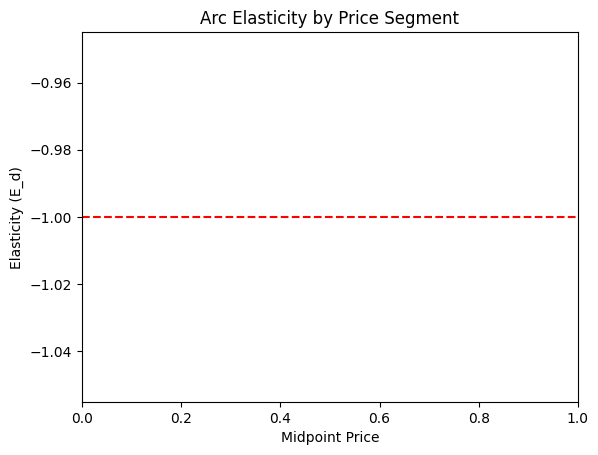

In [ ]:
# Plot elasticity vs midpoint price
elasticities.iscatter("Midpoint Price", "Arc Elasticity")



In [116]:
elasticities.iscatter("Midpoint Price", "Arc Elasticity", fit_line=True)